this is a part of bigger pipeline for the project (------------ADD LINK -------------)


##### --- for the Blog ----
## Project outline of CNN for tree identification

- tree species in Berlin - Analysis by Hany (Step 0)
a) berlin databank of trees:
berlin_trees = ['ACER', 'AESCULUS','BETULA', 'CARPINUS', 'CORYLUS','CRATAEGUS','FRAXINUS','PLATANUS','POPULUS', 'PRUNUS','QUERCUS','ROBINIA','SORBUS','TILIA', 'ULMUS']
b) Adding genus/family present in Austrian leave set
'FAGUS'


- Identification of suitable image dataset (Step 1) (### done)
(we face difficaties using imagenet (Explain why -----)
We decided we will focus on the tree species in Berlin and create an image dataset downloaded via bing with a focus on leaves. We decided we will measure our success by using the Austrian leaves dataset.
### deployment of model used in browser (Step 2)
- this is done , in the mid-term  (explain more ---------)

--> output file/google colab with text, code, results and conclusion
Inital Setup of softwarepipeline, deployment of model used in browser (Step 2)
--> Integration into Web application on Trees website
#### improving the model & Active learning (step 3, step 4)

-  Downloading Images from Bing and manually sorting (Step3)

(---------- rewrite-----------)

Active learn via python library (Step 4)  - via superintend
1) species in Berlin --> image download via bing focused on LEAVES OF SPECIES
(maybe future:) 2) large(very old and high circumference) tree vs small tree (young, saplings etc), no tree --> image download via bing
How to measure successful improvement of model? - Austrian leaves dataset
Decision and implentation of the “best model (Step 5)
All of this originates from the idea to combine species and age of tree to estimate CO2 absorption.
And DL/AI learning: implementing transfer learning and active learning



(---------- rewrite ----------)
Next steps:
download bing images of tree species in Berlin (Step 3)
manual labeling
Active learning voila/python notebook (deployment? database?) (Step 4)
CNN model (Step 5)
How to measure sucess? Austrian leaves dataset?
Own CNN
Transfer learning (pre trained eg on imagenet)
mobile net etc
I naturalist

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics

import time

### Trees in Berlin 
- based on a quick excel file we found 63 Genus, with futher reserch we decided to only include the most common one ( > 4000 trees)

In [ ]:
df = pd.read_excel('https://github.com/TechLabs-Berlin/st22-active-learn-trees/blob/DL-Neural-Network-updates/DL-neural-network/Step0%20-%20quick%20berlin%20tree%20analysis/AI%20tree%20in%20berlin.xlsx?raw=true')

df = df.dropna()
df

,Tree type,Tot_number
0,Abies,177.0
2,ACER,88399.0
4,AESCULUS,20605.0
6,AILANTHUS,934.0
8,ALNUS,1048.0
...,...,...
116,TILIA,152227.0
118,TOONA,3.0
120,TSUGA,3.0
122,ULMUS,6921.0


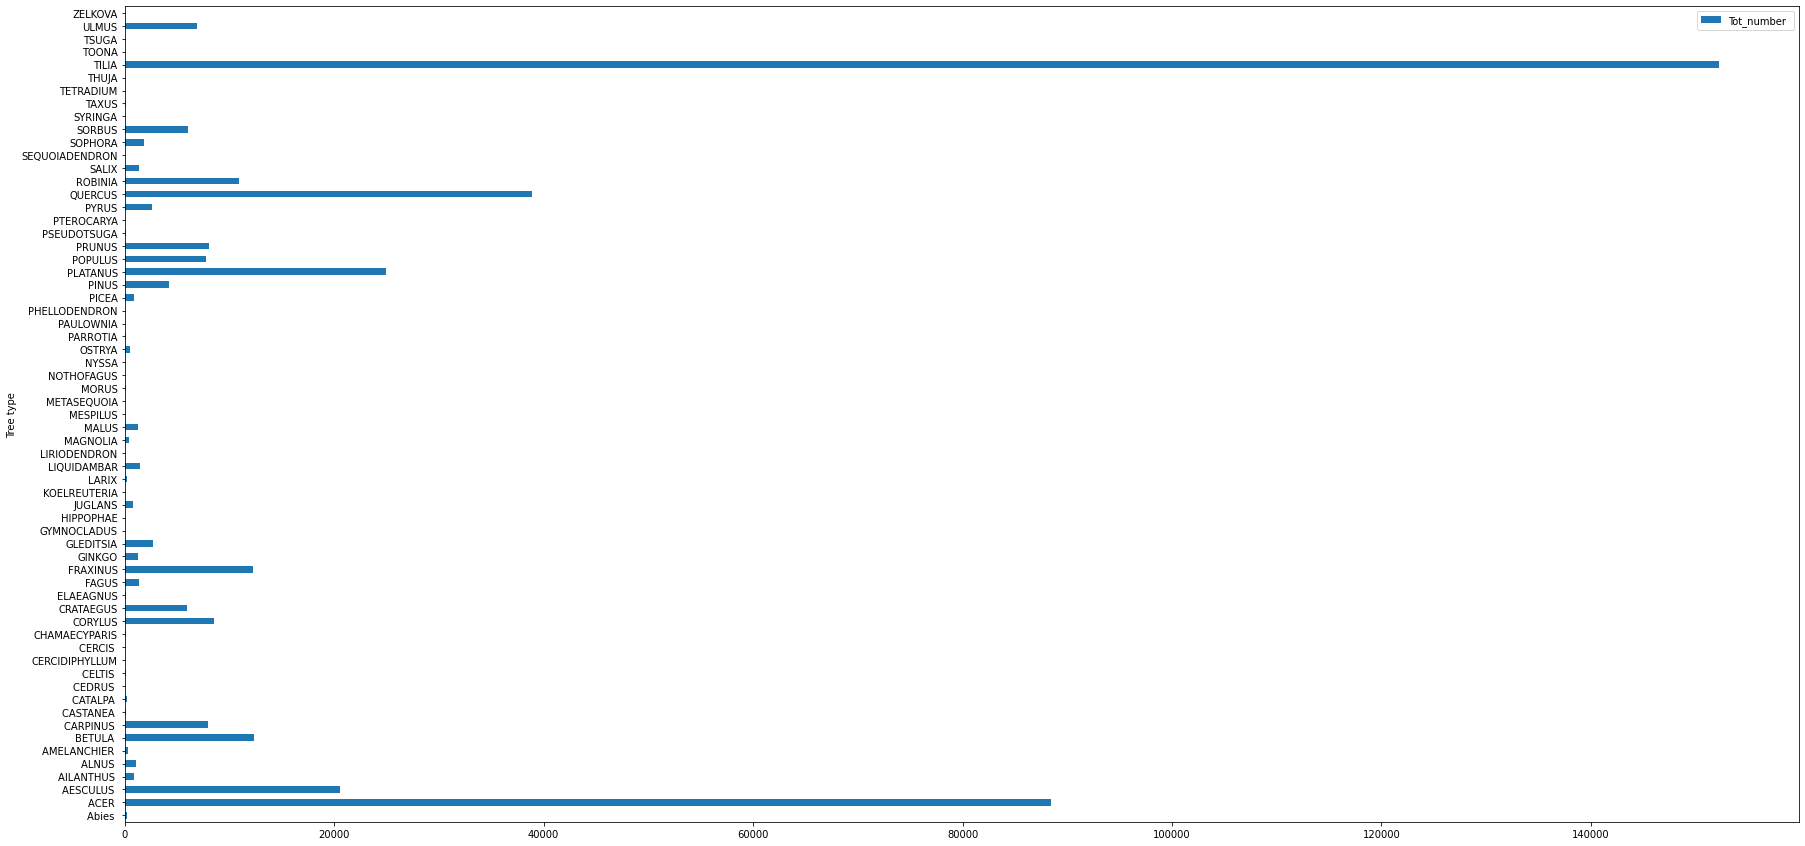

In [ ]:
#df.columns

plt.rcParams["figure.figsize"] = (30, 15)
df.plot.barh(x='Tree type', y='Tot_number ',rot=0)


In [ ]:
df_commen= df.loc[df["Tot_number "] >= 4000].reset_index(drop=True).sort_values(by=['Tot_number '])
df_commen

,Tree type,Tot_number
7,PINUS,4208.0
5,CRATAEGUS,5974.0
13,SORBUS,6019.0
15,ULMUS,6921.0
9,POPULUS,7768.0
3,CARPINUS,7961.0
10,PRUNUS,8027.0
4,CORYLUS,8485.0
12,ROBINIA,10896.0
6,FRAXINUS,12293.0


In [ ]:
## define tree genus -- we added Fagus---

berlin_trees = ['ACER leaves', 'AESCULUS leaves','BETULA leaves', 'CARPINUS leaves', 'CORYLUS leaves','CRATAEGUS leaves','FRAXINUS leaves','PLATANUS leaves','POPULUS leaves', 'PRUNUS leaves','QUERCUS leaves','ROBINIA leaves','SORBUS leaves','TILIA leaves', 'ULMUS leaves', 'Fagus leaves']

## Download images from Bing image
 to ensure better results the search is based on 2 criteria :
 
  1- use Latin names of the trees.

  2- limiting the Dataset to just tree leaves, to easily judge the results as the model intends to use Austrian leaves dataset as an external test set.

In [ ]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
from fastai.imports import *

path = Path('trees-bing-Berlin-test12')

### Download images from Bing image

for o in berlin_trees:
  downloader.download(o, limit=50, output_dir=path, adult_filter_off=False, force_replace=False, timeout=5)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[%] Downloading Images to /content/trees-bing-Berlin-test12/TILIA leaves


[!!]Indexing page: 1

[%] Indexed 17 Images on Page 1.


[%] Downloading Image #1 from http://www.euforgen.org/fileadmin/templates/euforgen.org/upload/speciesImages/Tilia_tomentosa/1.Tilia_tomentosa_youg_leaves.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.minnesotawildflowers.info/udata/r9ndp23q/pd3/tilia-americana-6432789-8.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.cals.ncsu.edu/plantbiology/ncsc/tnc/images/tilia_americana_heterophylla_Baskauf_lf.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.cals.ncsu.edu/plantbiology/ncsc/tnc/images/tiamhe50887.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Tilia_tomentosa.jpg/330px-Tilia_tomentosa.jpg
[%] File Downloaded !

[%] Downloading 

In [ ]:
# berlin_Baum_typ= ['Ahorn Laub', 'Kastanie Laub','Birke Laub', 'Hainbuche Laub', 'Hasel Laub','Weißdorn Laub','Esche Laub','Platane Laub','Pappel Laub', 'Lorbeer Laub','Eiche Laub','Robine Laub','Eberesche Laub','Linde Laub', 'Ulme Laub', 'Rotbuche Laub']

 **tree** categories (part of step 4)

### Saving the files on personal google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## checking the path,

!ls /content/gdrive/MyDrive/trees-bing-Berlin-test12

gdrive_pth = "/content/gdrive/MyDrive/trees-bing-Berlin-test12"

'ACER leaves'	   'CORYLUS leaves'    'PLATANUS leaves'  'ROBINIA leaves'
'AESCULUS leaves'  'CRATAEGUS leaves'  'POPULUS leaves'   'SORBUS leaves'
'BETULA leaves'    'Fagus leaves'      'PRUNUS leaves'	  'TILIA leaves'
'CARPINUS leaves'  'FRAXINUS leaves'   'QUERCUS leaves'   'ULMUS leaves'


### Dataset cleaning

In [ ]:
### cheaking if all images are all jpeg ??

import os
import cv2
def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir = "/content/gdrive/MyDrive/trees-bing-Berlin-test12"
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

processing class directory  ACER leaves
processing class directory  AESCULUS leaves
processing class directory  BETULA leaves
processing class directory  CARPINUS leaves
processing class directory  CORYLUS leaves
processing class directory  CRATAEGUS leaves
processing class directory  FRAXINUS leaves
processing class directory  PLATANUS leaves
processing class directory  POPULUS leaves
processing class directory  PRUNUS leaves
processing class directory  QUERCUS leaves
processing class directory  ROBINIA leaves
processing class directory  SORBUS leaves
processing class directory  TILIA leaves
processing class directory  ULMUS leaves
processing class directory  Fagus leaves
 no improper image files were found


######Achive: I found 2 files so i manually fixed them however, there maybe a chance to automate this in the future (written by:Hany date: 13-07-2022)

### Generate the DSet

- using keras as main engine 

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

#### Minor error ( ignored for now)

In [ ]:
### error & mismatch in names- removing of leaves in the Dset is reqiured (later)--- for now i will revert back to leaves 
berlin_species= ['ACER ', 'AESCULUS ','BETULA ', 'CARPINUS ', 'CORYLUS ','CRATAEGUS ','FRAXINUS ','PLATANUS ','POPULUS ', 'PRUNUS ','QUERCUS ','ROBINIA ','SORBUS ','TILIA ', 'ULMUS ', 'Fagus ']

In [ ]:
#### deprecated , however it is part of testing network 2 #### 

image_size = (180, 180)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    gdrive_pth,
    validation_split=0.3,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    gdrive_pth,
    validation_split=0.3,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 817 files belonging to 16 classes.
Using 572 files for training.
Found 817 files belonging to 16 classes.
Using 245 files for validation.


In [ ]:
### Dataset building ###

args = {
    "labels": "inferred",
    "label_mode": "categorical",
    "seed": 1,
    "validation_split": .3,
    "class_names": berlin_trees
}

### Model building 

In [ ]:
train = tf.keras.utils.image_dataset_from_directory(
    gdrive_pth,
    subset="training",
    **args
)

test = tf.keras.utils.image_dataset_from_directory(
  gdrive_pth,
  subset="validation",
    **args
)

Found 817 files belonging to 16 classes.
Using 572 files for training.
Found 817 files belonging to 16 classes.
Using 245 files for validation.


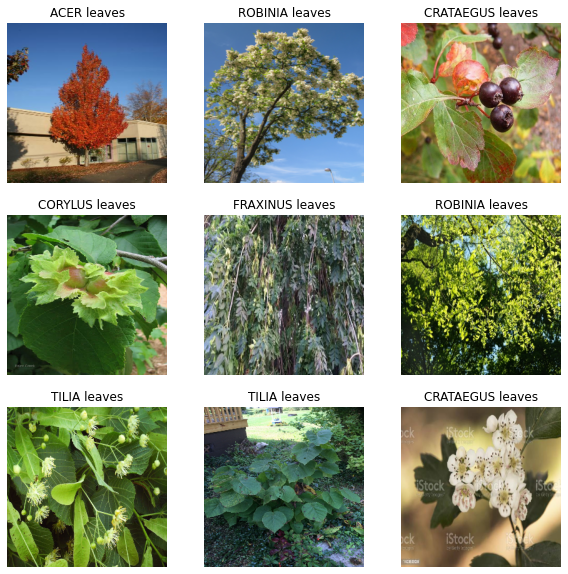

In [ ]:
### cheacking some images 

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        f = np.argmax(labels[i])
        plt.title(berlin_trees[f])
        plt.axis("off")

#### Prefetching : to Shorten the training time 

(enhancing ideas for later: using interleave for better performance [interlaeve in keras](https://www.tensorflow.org/guide/data_performance)

In [ ]:
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

### Model training using (pre-trained models)
- the apporch here is to use mobilenet_v2 and inauralist to make a new model 

### Image Type check for TF 
- jpg check by file names didnt work fully so we had to use "imghdr" lib to get the real extension of the image
-achieve there was 2 images and i changed them manually

In [ ]:
### image approch didnt work fully so we had to use "imghdr" lib to get the real extension of the image
### Achive: there was 2 imges and i changed them manully

from pathlib import Path
from PIL import Image
import imghdr

data_dir = "/content/gdrive/MyDrive/trees-bing-Berlin-test12"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

#### model with [inaturalist](https://tfhub.dev/google/inaturalist/inception_v3/feature_vector/5)

In [ ]:
from IPython.display import clear_output, Image, display, HTML

#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()   # no need for the old v1 
import tensorflow_hub as hub

In [ ]:
def train_model(network, epochs=11):
    model = Sequential(network)

    model.compile(
        optimizer='adam', # how to predict error/ tries to minimize error 
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
        )
  
    history = model.fit(
      train,
      validation_data=test,
      epochs=epochs
    )
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df, model

In [ ]:
def train_model_control(network, epochs=11):
    model = Sequential(network)

    model.compile(
        optimizer='adam', # how to predict error/ tries to minimize error 
        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
        )
  
    history = model.fit(
      train_ds,
      validation_data=val_ds,
      epochs=epochs
    )
    history_df = pd.DataFrame.from_dict(history.history)
    return history_df, model

In [ ]:
### settup the NN 

network_1 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/inaturalist/inception_v3/feature_vector/5",
                   trainable=False),  # Can be True, see below. trainable=True, arguments=dict(batch_norm_momentum=0.997))
    tf.keras.layers.Dense(16, activation='softmax')
])

network_1.build([None, 299, 299, 3])

In [ ]:
### training the model 

history_df, model = train_model(network_1)

Epoch 1/11


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


18/18 [==============================] - 129s 7s/step - loss: 2.7249 - accuracy: 0.5944 - val_loss: 9.6442 - val_accuracy: 0.2531
Epoch 2/11
18/18 [==============================] - 113s 6s/step - loss: 1.8284 - accuracy: 0.6748 - val_loss: 8.6021 - val_accuracy: 0.2694
Epoch 3/11
18/18 [==============================] - 111s 6s/step - loss: 1.6147 - accuracy: 0.6976 - val_loss: 7.9354 - val_accuracy: 0.3102
Epoch 4/11
18/18 [==============================] - 112s 6s/step - loss: 1.9450 - accuracy: 0.6958 - val_loss: 8.9693 - val_accuracy: 0.2939
Epoch 5/11
18/18 [==============================] - 112s 6s/step - loss: 2.1734 - accuracy: 0.6713 - val_loss: 10.6525 - val_accuracy: 0.2653
Epoch 6/11
18/18 [==============================] - 113s 6s/step - loss: 2.1750 - accuracy: 0.7063 - val_loss: 9.8594 - val_accuracy: 0.2531
Epoch 7/11
18/18 [==============================] - 112s 6s/step - loss: 1.3435 - accuracy: 0.7378 - val_loss: 8.9883 - val_accuracy: 0.2531
Epoch 8/11
18/18 [=====

### using mobilenet_v2_1.0_224

In [ ]:
## settup the NN 

network_2 = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_050_128/feature_vector/5",
                   trainable=False),  # Can be True, see below.
    tf.keras.layers.Dense(16, activation='softmax')
])
network_2.build([None, 128, 128, 3])

In [ ]:
### training the model 

history_df, model = train_model(network_2)

Epoch 1/11


ValueError: ignored

### self-made NN

In [ ]:
network_3 = Sequential([
   tf.keras.layers.Rescaling(1./255), # rescale input layer
  layers.Conv2D(16, 4, padding='same', activation='relu', input_shape=(256,256,3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 4, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(len(berlin_trees))

])

#network_3.summary()

In [ ]:
istory_df, model = train_model(network_3)

Epoch 1/11
18/18 [==============================] - 54s 3s/step - loss: 2.8792 - accuracy: 0.0402 - val_loss: 2.7725 - val_accuracy: 0.0694
Epoch 2/11
18/18 [==============================] - 52s 3s/step - loss: 2.7718 - accuracy: 0.0857 - val_loss: 2.7714 - val_accuracy: 0.0776
Epoch 3/11
18/18 [==============================] - 53s 3s/step - loss: 2.7194 - accuracy: 0.1241 - val_loss: 2.7690 - val_accuracy: 0.0980
Epoch 4/11
18/18 [==============================] - 51s 3s/step - loss: 2.5360 - accuracy: 0.1871 - val_loss: 2.8565 - val_accuracy: 0.1102
Epoch 5/11
18/18 [==============================] - 53s 3s/step - loss: 1.9437 - accuracy: 0.4126 - val_loss: 3.5347 - val_accuracy: 0.1347
Epoch 6/11
18/18 [==============================] - 51s 3s/step - loss: 1.3048 - accuracy: 0.6241 - val_loss: 5.9724 - val_accuracy: 0.1265
Epoch 7/11
18/18 [==============================] - 51s 3s/step - loss: 0.7504 - accuracy: 0.7832 - val_loss: 5.8908 - val_accuracy: 0.1633
Epoch 8/11
18/18 [==

### it clearly goes to over fitting with a very low percentges on the validation 

In [ ]:
network_3.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 256, 256, 16)      784       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      8224      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 64)      

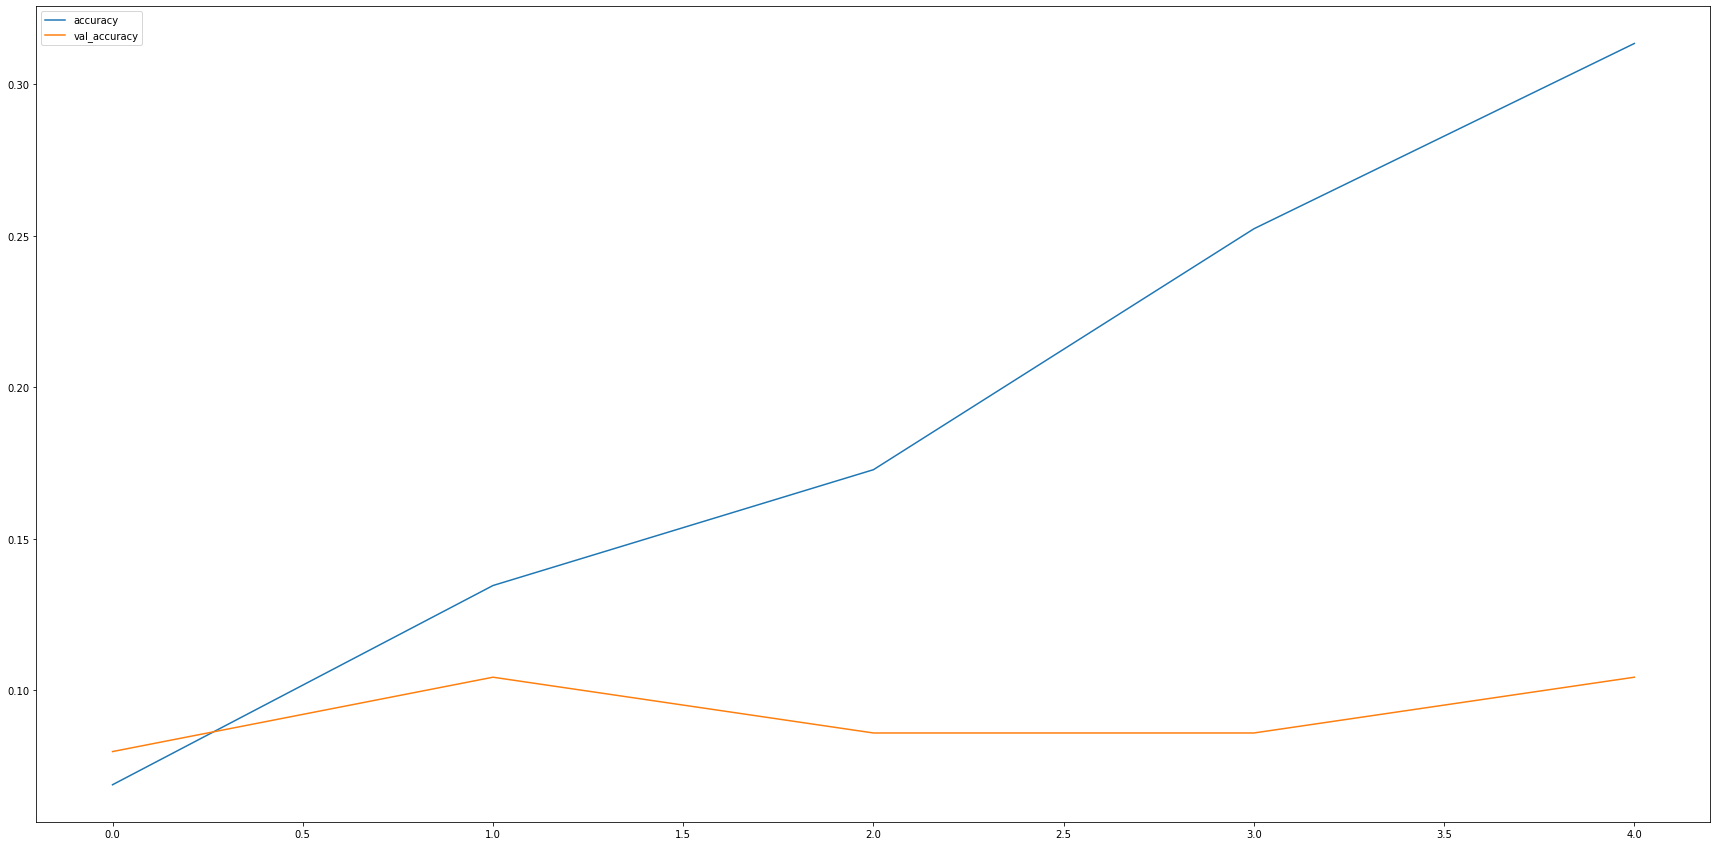

In [ ]:
history_df[["accuracy", "val_accuracy"]].plot()

### (optional): Active learning 


In [ ]:
!pip install superintendent
!jupyter nbextension enable --py --sys-prefix ipyevents
!pip install superintendent[tests,examples]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 322 kB/s 
     |████████████████████████████████| 3.0 MB 7.5 MB/s 
     |████████████████████████████████| 130 kB 55.4 MB/s 
Enabling notebook extension ipyevents/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from superintendent import ClassLabeller
from sklearn.datasets import load_digits
digits = load_digits().data.reshape(-1, 8, 8)

widget = ClassLabeller.from_images(
    features=digits[:10, ...],
    canvas_size=(200, 200),
    options= berlin_species

)
widget

ClassLabeller(children=(HBox(children=(FloatProgress(value=0.0, description='Progress:', max=1.0),)), Box(chil…

### Dead code (example on tF CNN)

In [ ]:
tf.keras.layers.Dense?

In [ ]:
network_2 = tf.keras.Sequential()

x = tf.keras.layers.InputLayer((299, 299, 3), name="InputLayer")
network_2.add(x)

# activation='relu'is the default function, What is ReLu? https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
x = tf.keras.layers.Dense(100, name="HiddenLayer1", activation='relu')
network_2.add(x) 

x = tf.keras.layers.Dense(40, name="HiddenLayer2", activation='relu')
network_2.add(x) 

# As this is classificaion problem the "correct" activation fuction is softmax
network_2.add(tf.keras.layers.Dense(16, name="OutputLayer", activation='softmax')) # 

network_2.summary()



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HiddenLayer1 (Dense)        (None, 256, 256, 100)     400       
                                                                 
 HiddenLayer2 (Dense)        (None, 256, 256, 40)      4040      
                                                                 
 OutputLayer (Dense)         (None, 256, 256, 16)      656       
                                                                 
Total params: 5,096
Trainable params: 5,096
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_df, model = train_model(network_2)


Epoch 1/5


ValueError: ignored